# 6.6 Sourcing and Analizying Time-Series Data

## This script contains the following:

### 1. Importing libraries and Data

### 2. Subsetting, wrangling and cleaning time-series data

### 3. Times Series analysis: decomposition

### 4. Testing for stationarity

### 5. Stationaring the Airbnb Madrid´s Data

### 1. Importing libraries and Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
from datetime import datetime
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
# Creating data path and importing data

path=r'C:\Users\carol\Documents'

In [3]:
df = pd.read_csv(os.path.join(path,'6.6 Sourcing and analysing time series data','df_listings_merged_6.6.csv'))

In [4]:
df.head(5)

,last_review_x,number_of_reviews_x
0,29/05/2024,186
1,15/05/2024,30
2,NaN,0
3,NaN,0
4,NaN,0


In [5]:
df.shape

(11767, 2)

In [6]:
df.columns

Index(['last_review_x', 'number_of_reviews_x'], dtype='object')

In [7]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

last_review_x          1946
number_of_reviews_x       0
dtype: int64

In [8]:
# Remove null values 

df2 = df.dropna()

In [9]:
#Checking data after removing NaN values

df2.isnull().sum() 

last_review_x          0
number_of_reviews_x    0
dtype: int64

In [10]:
df2.head(5)

,last_review_x,number_of_reviews_x
0,29/05/2024,186
1,15/05/2024,30
7,08/11/2014,11
8,02/02/2020,10
16,20/09/2018,1


### 2. Create a Subset

In [11]:
# Create a Subset with last review and number of reviews
df2 = df2[['last_review_x', 'number_of_reviews_x']]  # Select relevant columns

In [12]:
df2.head(5)

,last_review_x,number_of_reviews_x
0,29/05/2024,186
1,15/05/2024,30
7,08/11/2014,11
8,02/02/2020,10
16,20/09/2018,1


**Note** df2 is a serie and we need to turn it into a DF having date as a index

In [13]:
# Turn df_sub into data frame

df2 = df2.reset_index()
df2.head(5)

,index,last_review_x,number_of_reviews_x
0,0,29/05/2024,186
1,1,15/05/2024,30
2,7,08/11/2014,11
3,8,02/02/2020,10
4,16,20/09/2018,1


In [14]:
# setthe 

df2['datetime'] = pd.to_datetime(df2['last_review_x'], dayfirst=True, errors='coerce') # Convert 'last_review_x' to datetime format, with day first
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['last_review_x'], axis=1, inplace=True) # Drop the "last_review_x" column.
df2.head()

,index,number_of_reviews_x
datetime,,
2024-05-29,0,186
2024-05-15,1,30
2014-11-08,7,11
2020-02-02,8,10
2018-09-20,16,1


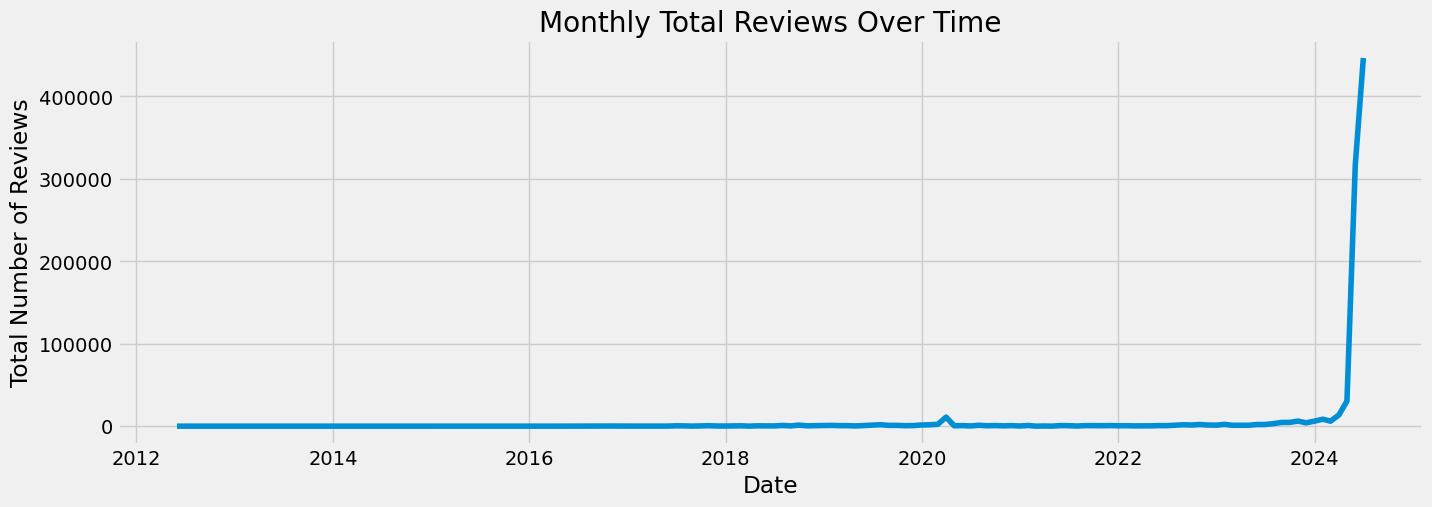

In [17]:
# Resample the data by month and calculate the average number of reviews per month
df_monthly = df2['number_of_reviews_x'].resample('M').sum()

# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_monthly)
plt.title("Monthly Total Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Total Number of Reviews")
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

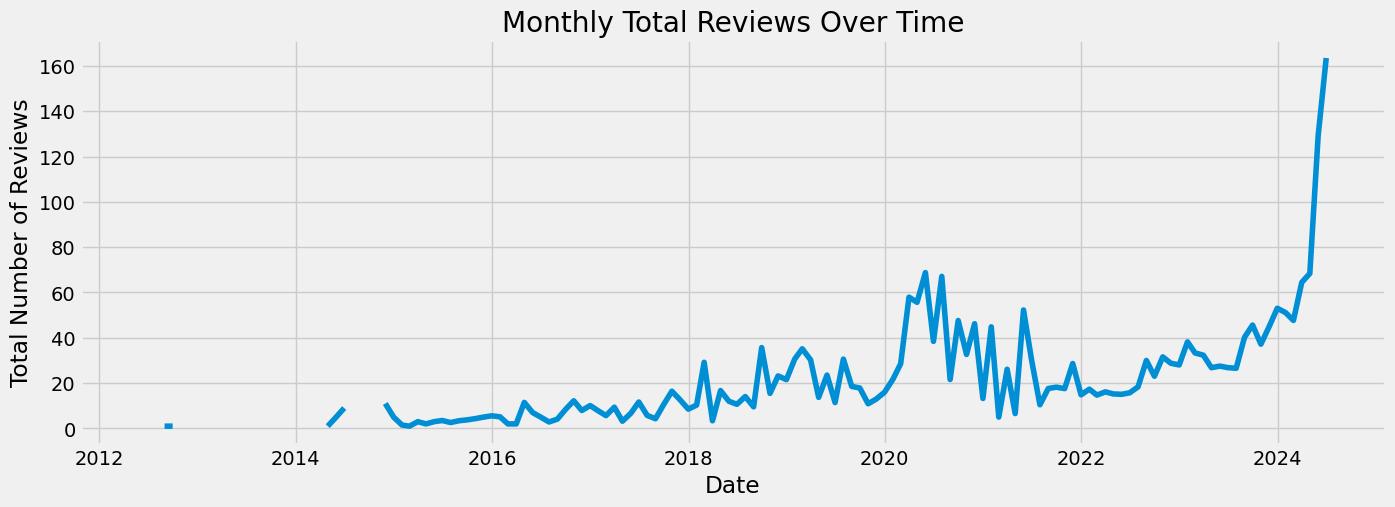

In [26]:
# Resample the data by month and calculate the average number of reviews per month
df_monthly = df2['number_of_reviews_x'].resample('M').mean()
# Ensure the index has a monthly frequency
df_monthly = df_monthly.asfreq('M')

# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_monthly)
plt.title("Monthly Total Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Total Number of Reviews")
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

**Note** This chart shows that there has been a significant recent increase in review activity, possibly indicating a rise in business listings, customer engagement, or other relevant market factors.

### 3. time-series: decomposition

In [27]:
df_monthly.isnull().sum()

20

In [28]:
# Remove null values 

df_monthly = df_monthly.dropna()

In [29]:
df_monthly.isnull().sum()

0

In [32]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_monthly, model='adi')


# Plot the decomposition components (trend, seasonal, residual)
decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None